In [1]:
# 1：ライブラリのインポート--------------------------------
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import cluster, preprocessing, mixture #機械学習用のライブラリを利用

In [3]:
# 2：Wineのデータセットを読み込む--------------------------------
df_wine_all=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
#品種(0列、1～3)と色（10列）とプロリンの量(13列)を使用する
df_wine=df_wine_all[[0,10,13]]
df_wine.columns = ['class', 'color', 'proline']
pd.DataFrame(df_wine)  #この行を実行するとデータが見れる

,class,color,proline
0,1,5.64,1065
1,1,4.38,1050
2,1,5.68,1185
3,1,7.80,1480
4,1,4.32,735
...,...,...,...
173,3,7.70,740
174,3,7.30,750
175,3,10.20,835
176,3,9.30,840


In [12]:
# 3：データの整形-------------------------------------------------------
X=df_wine[['color', 'proline']]
sc=preprocessing.StandardScaler()
sc.fit(X)
X_norm=sc.transform(X)

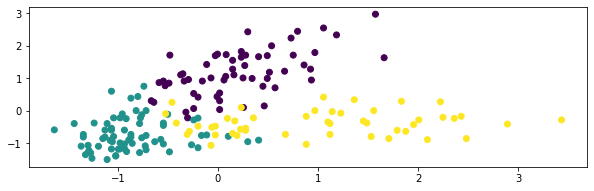

In [18]:
# 4：プロットしてみる------------------------------------------
%matplotlib inline

x=X_norm[:, 0]
y=X_norm[:, 1]
z=df_wine['class']
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.scatter(x, y, c=z)
plt.show()

In [20]:
# 4：k-meansを実施---------------------------------
km=cluster.KMeans(n_clusters=3)
z_km=km.fit(X_norm)

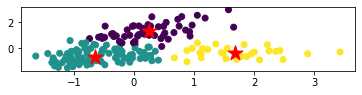

In [22]:
# 5: 結果をプロット-----------------------------------------------
plt.subplot(3,1,2)
plt.scatter(x,y,c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:,0],z_km.cluster_centers_[:,1],s=250, marker='*',c='red')
plt.show()

In [33]:
# 解説6：GMMを実施---------------------------------
# GMM・Clusteringは教師なし学習の一種です。データを自動的にクラスターに分けます。(やっていることの意図は、ほとんどKMeansと同じ。)
# KMeansが同心円状を仮定するのに対して、GMMは傾いた楕円形のクラスターを仮定することができます。
# これはクラスター数を3と設定し、covariance（共分散）行列を各ガウス分布で異なるものを設定しています。
gmm=mixture.GaussianMixture(n_components=3, covariance_type="full")
gmm.fit(X_norm)
z_gmm=gmm.predict(X_norm)

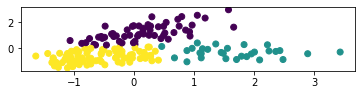

In [34]:
# 7: 結果をプロット-----------------------------------------------
plt.subplot(3,1,3)
plt.scatter(x,y,c=z_gmm)
plt.show()